# blend

In [26]:
from data_io import load_oof
import addict
import numpy as np
from data_io import load_train_features, load_test_features

# from models import LGBModel
from my_logger import print_info

import imp
import validator
imp.reload(validator)
from validator import KFoldValidator

%matplotlib inline

# load oof

In [2]:
oof_outlier = load_oof("outlier002")
oof_outlier.shape

(201917, 3)

In [3]:
oof_nooutlier = load_oof("no-outlier-006")
oof_nooutlier.shape

(201917, 3)

In [55]:
oof_lgb = load_oof("lgb001")
oof_lgb.shape

(201917, 3)

In [7]:
oof_outlier.head()

,outlier002,target,card_id
0,0.003778,0.0,C_ID_92a2005557
1,0.266624,0.0,C_ID_3d0044924f
2,0.119234,0.0,C_ID_d639edf6cd
3,0.017272,0.0,C_ID_186d6a6901
4,0.001915,0.0,C_ID_cdbd2c0db2


In [8]:
oof_nooutlier.head()

,no-outlier-006,target,card_id
0,-0.393638,-0.820283,C_ID_92a2005557
1,0.062217,0.392913,C_ID_3d0044924f
2,0.750316,0.688056,C_ID_d639edf6cd
3,0.365112,0.142495,C_ID_186d6a6901
4,-0.127878,-0.159749,C_ID_cdbd2c0db2


In [56]:
oof_lgb.head()

,lgb001,target,card_id
0,-0.361844,-0.820283,C_ID_92a2005557
1,-0.529859,0.392913,C_ID_3d0044924f
2,0.584098,0.688056,C_ID_d639edf6cd
3,0.354337,0.142495,C_ID_186d6a6901
4,-0.140202,-0.159749,C_ID_cdbd2c0db2


# validator

In [38]:
model_name = "blend-007"
train_data = load_train_features()
print_info("train_data.shape", train_data.shape)
print_info("train_data.head", train_data.head())

features = list(train_data.columns)
features.remove("card_id")
features.remove("target")

id_train = train_data.card_id.values
X_train = train_data[features].values
y_train = train_data.target.values
# y_train = (y_train < -33).astype(np.int32)  # {is_outlier: 1 not_outlier: 0}

print_info("id_train.shape", id_train.shape)
print_info("X_train.shape", X_train.shape)
print_info("y_train.shape", y_train.shape)

test_data = load_test_features()
id_test = test_data.card_id.values
X_test = test_data[features].values
print_info("id_test.shape", id_test.shape)
print_info("X_test.shape", X_test.shape)

[info] train_data.shape : (201917, 501)
[info] train_data.head :    feature_1  feature_2  feature_3    target          card_id  fa_month  \
0        5.0        2.0        1.0 -0.820283  C_ID_92a2005557  201706.0   
1        4.0        1.0        0.0  0.392913  C_ID_3d0044924f  201701.0   
2        2.0        2.0        0.0  0.688056  C_ID_d639edf6cd  201608.0   
3        4.0        3.0        0.0  0.142495  C_ID_186d6a6901  201709.0   
4        1.0        3.0        0.0 -0.159749  C_ID_cdbd2c0db2  201711.0   

   purchase_amount_sum_hist_trans  purchase_amount_mean_hist_trans  \
0                     -165.968735                        -0.638341   
1                     -210.006332                        -0.600018   
2                      -29.167391                        -0.678311   
3                      -49.491364                        -0.642745   
4                      -48.687656                        -0.366073   

   purchase_amount_max_hist_trans  purchase_amount_min_hist_tra

In [39]:
validator = KFoldValidator(id_train, X_train, y_train, id_test, X_test)
validator.show_folds()

[info] fold : 0
[info] X_trn.shape : (161533, 499)
[info] y_trn.shape : (161533,)
[info] y_trn.mean : -0.3931693136692047
[info] X_val.shape : (40384, 499)
[info] y_val.shape : (40384,)
[info] y_val.mean : -0.39550429582595825
[info] fold : 1
[info] X_trn.shape : (161533, 499)
[info] y_trn.shape : (161533,)
[info] y_trn.mean : -0.39050015807151794
[info] X_val.shape : (40384, 499)
[info] y_val.shape : (40384,)
[info] y_val.mean : -0.4061805009841919
[info] fold : 2
[info] X_trn.shape : (161534, 499)
[info] y_trn.shape : (161534,)
[info] y_trn.mean : -0.38485121726989746
[info] X_val.shape : (40383, 499)
[info] y_val.shape : (40383,)
[info] y_val.mean : -0.42877712845802307
[info] fold : 3
[info] X_trn.shape : (161534, 499)
[info] y_trn.shape : (161534,)
[info] y_trn.mean : -0.4023605287075043
[info] X_val.shape : (40383, 499)
[info] y_val.shape : (40383,)
[info] y_val.mean : -0.3587389886379242
[info] fold : 4
[info] X_trn.shape : (161534, 499)
[info] y_trn.shape : (161534,)
[info] y_t

# blend

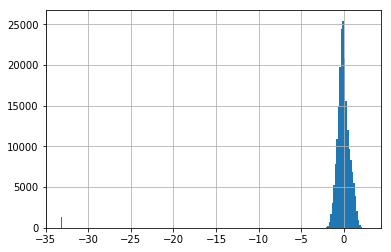

In [41]:
oof_blend.oof.hist(bins=200)

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error

def loss(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

In [43]:
oof_nooutlier["oof"] = oof_nooutlier["no-outlier-006"]

validator.validate_oof_df(oof_nooutlier, loss)
validator.show_metric()

[info] metrics : [3.8407729, 3.8772514, 3.954779, 3.6266341, 3.763578]
[info] metrics.mean : 3.812602996826172
[info] metrics.std : 0.11151217669248581


In [53]:
model_name = "blend-007"

oof_blend = oof_nooutlier.copy()
oof_blend["oof"] = oof_blend["no-outlier-006"]

oof_blend.loc[oof_outlier["outlier002"] > 0.96, "oof"] = -33.21928

In [54]:
validator.validate_oof_df(oof_blend, loss)
validator.show_metric()

[info] metrics : [3.8407729, 3.8772514, 3.975481, 3.6266341, 3.7605898]
[info] metrics.mean : 3.816145658493042
[info] metrics.std : 0.11724268645048141


In [57]:
validator.validate_oof("lgb001", loss)
validator.show_metric()

[info] metrics : [3.6859305, 3.7088845, 3.7904081, 3.4864376, 3.60438]
[info] metrics.mean : 3.655208110809326
[info] metrics.std : 0.10312232375144958


In [60]:
for alpha in (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9):
    oof_blend2 = oof_lgb.copy()
    oof_blend2["oof"] = oof_lgb.lgb001 * alpha + oof_nooutlier["no-outlier-006"] * (1 - alpha)

    validator.validate_oof_df(oof_blend2, loss)
    validator.show_metric()

[info] metrics : [3.8127203157286798, 3.847898774575702, 3.9261532471088967, 3.598879366162936, 3.735526184720921]
[info] metrics.mean : 3.7842355776594268
[info] metrics.std : 0.11111663957050981
[info] metrics : [3.787340700630309, 3.82120119617364, 3.9001184447601904, 3.574044694065162, 3.710050606399499]
[info] metrics.mean : 3.7585511284057604
[info] metrics.std : 0.11062558516721983
[info] metrics : [3.764687883472475, 3.7972145314138896, 3.8767267771350813, 3.5521912095586874, 3.6872044003332545]
[info] metrics.mean : 3.7356049603826778
[info] metrics.std : 0.11003648579086722
[info] metrics : [3.744811348774588, 3.775990443209176, 3.856026346379943, 3.5333742279109597, 3.667036711039378]
[info] metrics.mean : 3.7154478154628094
[info] metrics.std : 0.10934749794421819
[info] metrics : [3.727755506533435, 3.7575757438164215, 3.838060697985239, 3.5176424791006546, 3.649591943336413]
[info] metrics.mean : 3.698125274154433
[info] metrics.std : 0.10855759334775941
[info] metrics : 